----------
Simulation-Based Methods (Monte Carlo)
---------

In [1]:
import numpy as np
import pandas as pd

def monte_carlo_credit_risk(n_simulations, asset_value, asset_volatility, liabilities, time_horizon, risk_free_rate, default_threshold):
    """
    Performs Monte Carlo simulation to estimate the probability of default.

    Args:
        n_simulations: Number of simulation paths.
        asset_value: Current value of firm's assets
        asset_volatility: Volatility of firm's assets
        liabilities: Level of debt obligations
        time_horizon: Time horizon
        risk_free_rate: Risk free rate of interest.
        default_threshold: Level of assets when default occurs.

    Returns:
        Probability of default from simulations.
    """

    np.random.seed(42)
    simulated_asset_values = np.zeros(n_simulations)
    for i in range(n_simulations):
        #simulate change in assets using geometric Brownian Motion
        z = np.random.normal(0,1)
        # Use the Geometric Brownian Motion formula to simulate asset value at the end of the time horizon
        simulated_asset_values[i] = asset_value * np.exp((risk_free_rate - 0.5 * asset_volatility**2) * time_horizon + asset_volatility * np.sqrt(time_horizon) * z)
    # identify how many simulations are less than the liabilities
    default_counts = sum(simulated_asset_values < default_threshold)
    # probability is just count / number of simulations
    probability_of_default = default_counts / n_simulations

    return probability_of_default


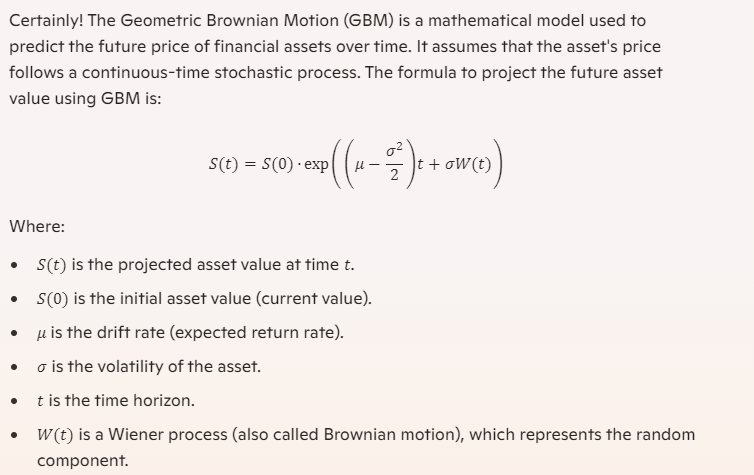

In [2]:
# Example Usage
n_simulations = 1000
asset_value = 100
asset_volatility = 0.2
liabilities = 80
time_horizon = 1
risk_free_rate = 0.05
default_threshold = liabilities

monte_carlo_prob_default = monte_carlo_credit_risk(n_simulations, asset_value, asset_volatility, liabilities, time_horizon, risk_free_rate, default_threshold)
print(f"Monte Carlo Probability of Default: {monte_carlo_prob_default:.4f}")

Monte Carlo Probability of Default: 0.0950
